# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [0]:
#importing some useful packages
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
import numpy as np
import pandas as pd
#import cv2
%matplotlib inline
IMG_HEIGHT = 32
IMG_WIDTH = 32

In [2]:
from pathlib import Path
import sys
import os

!mkdir car
proj_folder = Path("/content/car")
os.chdir(proj_folder)
!git clone https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project
proj_folder = Path("/content/car/CarND-Traffic-Sign-Classifier-Project/") 
os.chdir(proj_folder)
data_dir = "data"
!mkdir {data_dir}
os.chdir(data_dir)
!wget https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip
!unzip -o traffic-signs-data.zip
!ls

Cloning into 'CarND-Traffic-Sign-Classifier-Project'...
remote: Enumerating objects: 343, done.
remote: Total 343 (delta 0), reused 0 (delta 0), pack-reused 343
Receiving objects: 100% (343/343), 1013.78 KiB | 2.32 MiB/s, done.
Resolving deltas: 100% (181/181), done.
--2020-05-24 00:40:34--  https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.116.41
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.116.41|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123524425 (118M) [application/zip]
Saving to: ‘traffic-signs-data.zip’

traffic-signs-data. 100%[===================>] 117.80M  18.6MB/s    in 7.4s    

2020-05-24 00:40:42 (15.9 MB/s) - ‘traffic-signs-data.zip’ saved [123524425/123524425]

Archive:  traffic-signs-data.zip
  inflating: test.p                  
  inflating: train.p                 
  inflating: valid.p               

In [0]:
# Load pickled data
import pickle

training_file = 'train.p'
validation_file = 'valid.p'
testing_file = 'test.p'
#os.path.join(proj_folder, data_dir, validation_file)

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

#with open(file2write, 'wb') as config_dictionary_file:
#    pickle.dump(dictionary, config_dictionary_file)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [0]:
s_train, c_train = train['sizes'], train['coords']
s_valid, c_valid = valid['sizes'], valid['coords']
s_test, c_test = test['sizes'], test['coords']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [5]:
print(f"X_train {X_train.shape}, y_train {y_train.shape}")
print(f"X_valid {X_valid.shape}, y_valid {y_valid.shape}")
print(f"X_test {X_test.shape}, y_test {y_test.shape}")

X_train (34799, 32, 32, 3), y_train (34799,)
X_valid (4410, 32, 32, 3), y_valid (4410,)
X_test (12630, 32, 32, 3), y_test (12630,)


In [0]:
# print(f"y_train classes/counts {np.unique(y_train).shape}:{np.unique(y_train, return_counts=True)}")
# print(f"y_valid classes/counts  {np.unique(y_valid).shape}:{np.unique(y_valid , return_counts=True)}")
# print(f"y_test classes/counts  {np.unique(y_test).shape}:{np.unique(y_test , return_counts=True)}")

In [7]:
print('Train Labels')
display(pd.DataFrame({'qty':np.unique(y_train, return_counts=True)[1]}).T)
print('\nValidation Labels')
display(pd.DataFrame({'qty':np.unique(y_valid, return_counts=True)[1]}).T)
print('\nTest Labels')
display(pd.DataFrame({'qty':np.unique(y_test, return_counts=True)[1]}).T)


Train Labels


0     1     2     3     4     5    6   ...   36   37    38   39   40   41   42
qty  180  1980  2010  1260  1770  1650  360  ...  330  180  1860  270  300  210  210

[1 rows x 43 columns]


Validation Labels


0    1    2    3    4    5   6    7   ...   35  36  37   38  39  40  41  42
qty  30  240  240  150  210  210  60  150  ...  120  60  30  210  30  60  30  30

[1 rows x 43 columns]


Test Labels


0    1    2    3    4    5    6    7   ...   35   36  37   38  39  40  41  42
qty  60  720  750  450  660  630  150  450  ...  390  120  60  690  90  90  60  90

[1 rows x 43 columns]

In [12]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (X_train.shape[1:])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [9]:
names = pd.read_csv(os.path.join(proj_folder,'signnames.csv'), index_col='ClassId')
display(names)

SignName
ClassId                                                   
0                                     Speed limit (20km/h)
1                                     Speed limit (30km/h)
2                                     Speed limit (50km/h)
3                                     Speed limit (60km/h)
4                                     Speed limit (70km/h)
5                                     Speed limit (80km/h)
6                              End of speed limit (80km/h)
7                                    Speed limit (100km/h)
8                                    Speed limit (120km/h)
9                                               No passing
10            No passing for vehicles over 3.5 metric tons
11                   Right-of-way at the next intersection
12                                           Priority road
13                                                   Yield
14                                                    Stop
15                                             No vehicles
16                Vehicles over 3.5 metric tons prohibited
17                                                No entry
18                                         General caution
19                             Dangerous curve to the left
20                            Dangerous curve to the right
21                                            Double curve
22                                              Bumpy road
23                                           Slippery road
24                               Road narrows on the right
25                                               Road work
26                                         Traffic signals
27                                             Pedestrians
28                                       Children crossing
29                                       Bicycles crossing
30                                      Beware of ice/snow
31                                   Wild animals crossing
32                     End of all speed and passing limits
33                                        Turn right ahead
34                                         Turn left ahead
35                                              Ahead only
36                                    Go straight or right
37                                     Go straight or left
38                                              Keep right
39                                               Keep left
40                                    Roundabout mandatory
41                                       End of no passing
42       End of no passing by vehicles over 3.5 metric ...

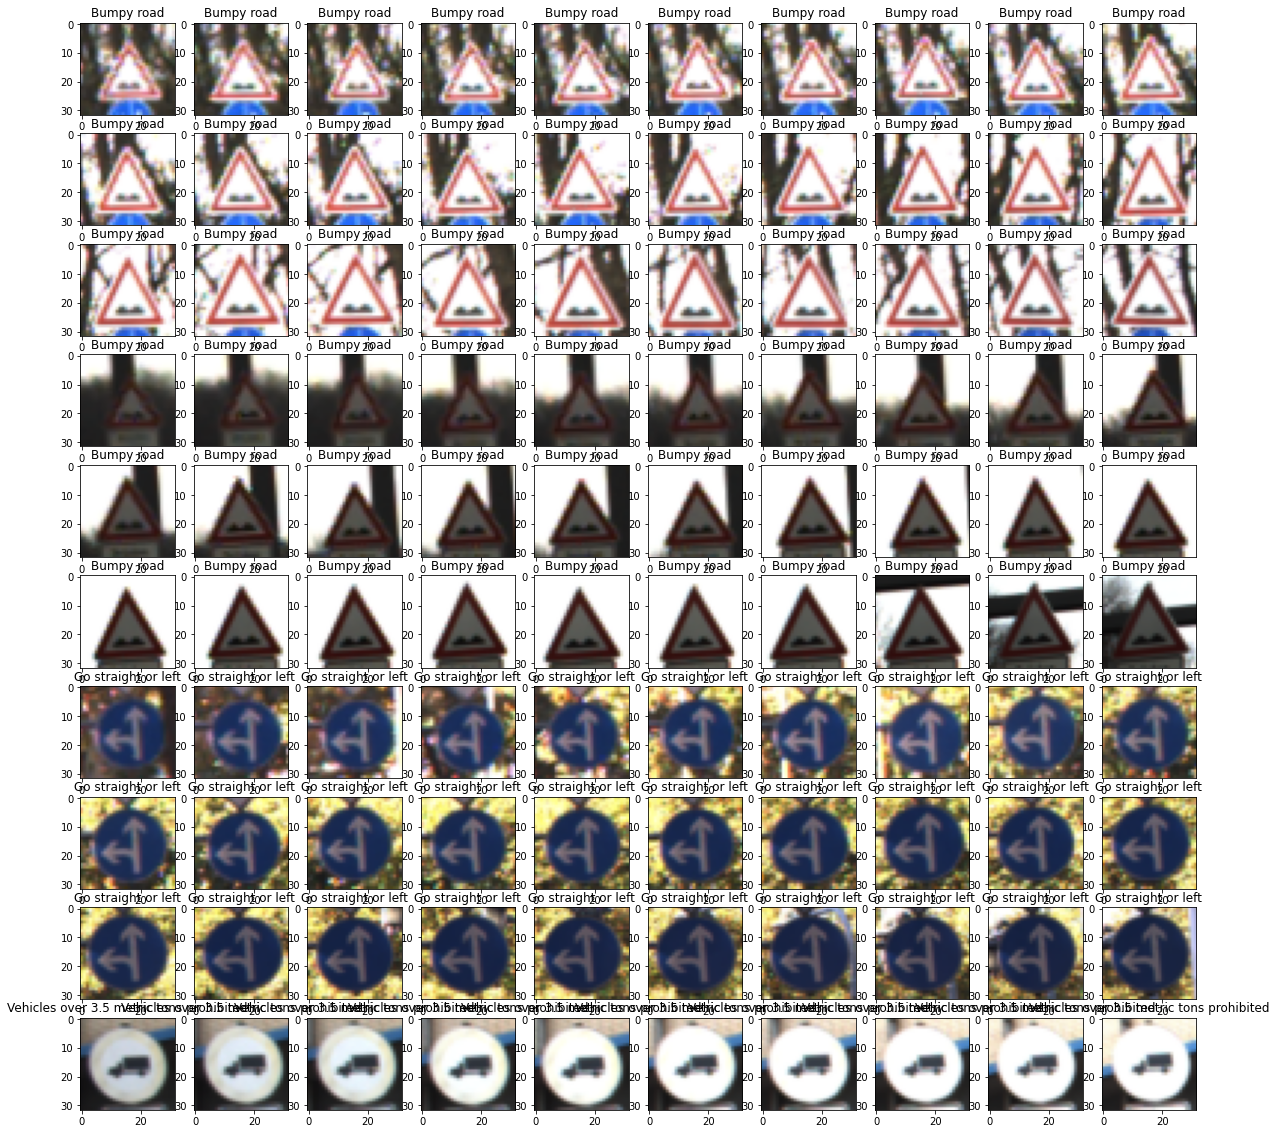

In [10]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
#import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
#%matplotlib inline
rows = 10
cols = 10
offset = 600
plt.figure(figsize=(20,20))
for i, img in enumerate(X_valid[offset:offset+100]):
    plt.subplot(rows, cols, i+1,  title=names.iloc[y_valid[i+offset]].SignName), plt.imshow(img, aspect='auto')


In [0]:
def mask_image(img, coords, sizes):
    x1, y1, x2, y2 = coords
    w, h = sizes
    img[:int(x1*IMG_WIDTH/w)] = 0
    img[int(x2*IMG_WIDTH/w):] = 0
    img[:,:int(y1*IMG_HEIGHT/h)] = 0
    img[:,int(y2*IMG_HEIGHT/h):] = 0
    return img
#plt.imshow(img, aspect='auto')

In [0]:
def mask_dataset(data, coord_data, size_data):
    for i, img in enumerate(data):
        mask_image(img, coord_data[i], size_data[i])


In [0]:
mask_dataset(X_train, c_train, s_train)
mask_dataset(X_valid, c_valid, s_valid)
mask_dataset(X_test, c_test, s_test)

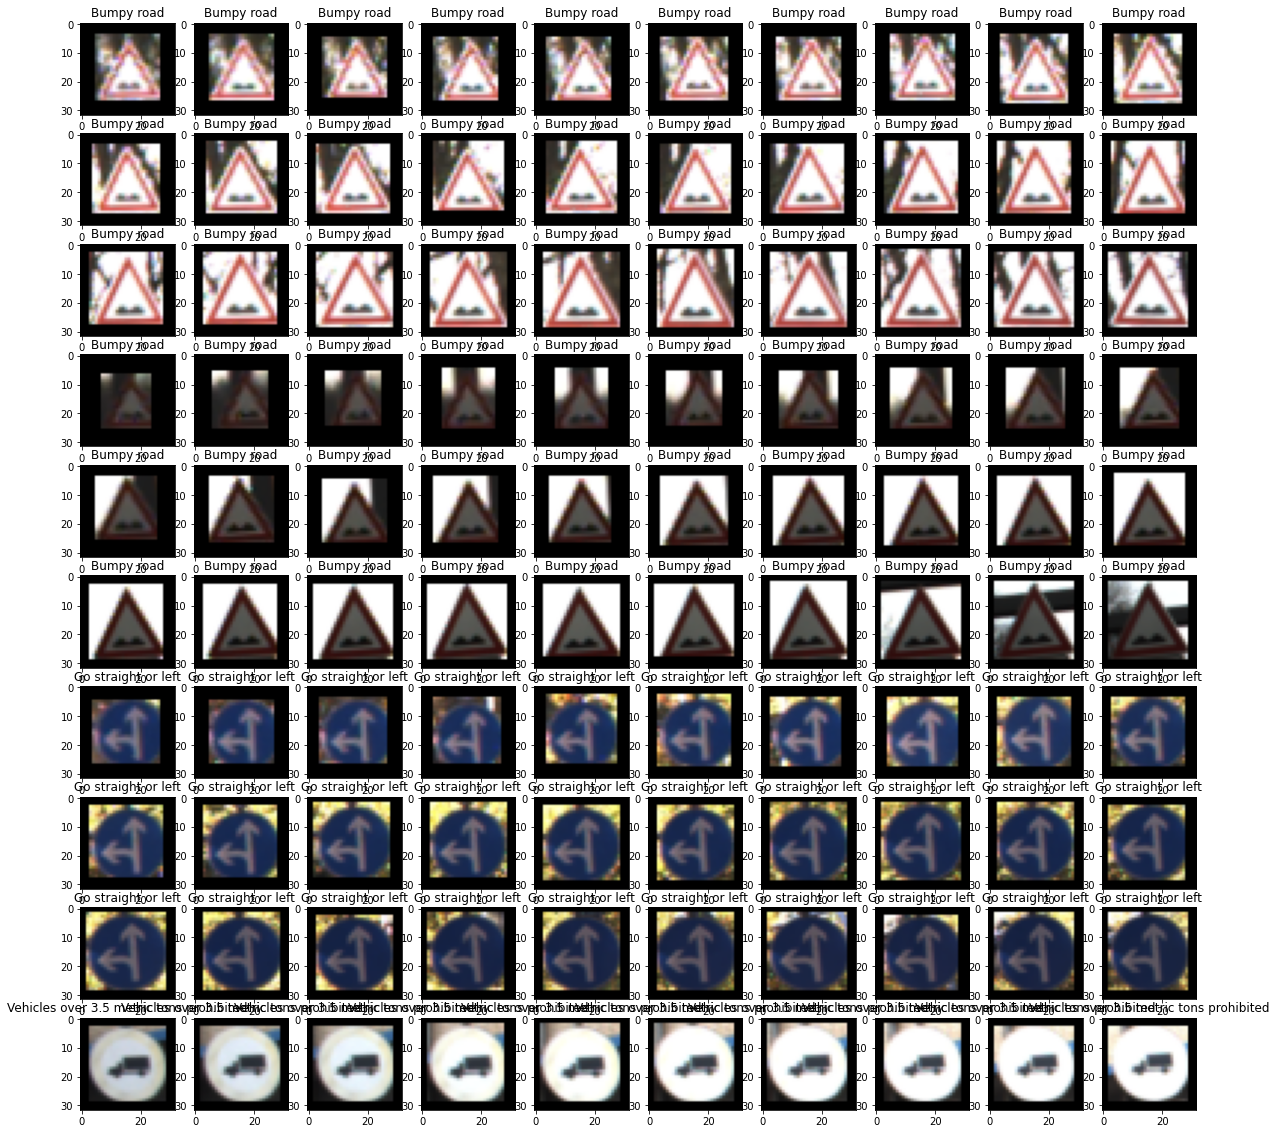

In [14]:
#'sizes' is a list containing tuples, (width, height) representing the original width and height the image.
#'coords' is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. THESE 
rows = 10
cols = 10
offset = 600
plt.figure(figsize=(20,20))
for i, img in enumerate(X_valid[offset:offset+100]):
    plt.subplot(rows, cols, i+1,  title=names.iloc[y_valid[i+offset]].SignName), plt.imshow(img, aspect='auto')


### Sample All Classes

In [15]:
signs_ref = pd.DataFrame({'Pict':list(X_test)})
signs_ref['lab'] = y_test #np.argmax(y_test, axis=1)
print(signs_ref.shape)
print(np.array(list(signs_ref.groupby(by='lab').first().Pict)).shape)

(12630, 2)
(43, 32, 32, 3)


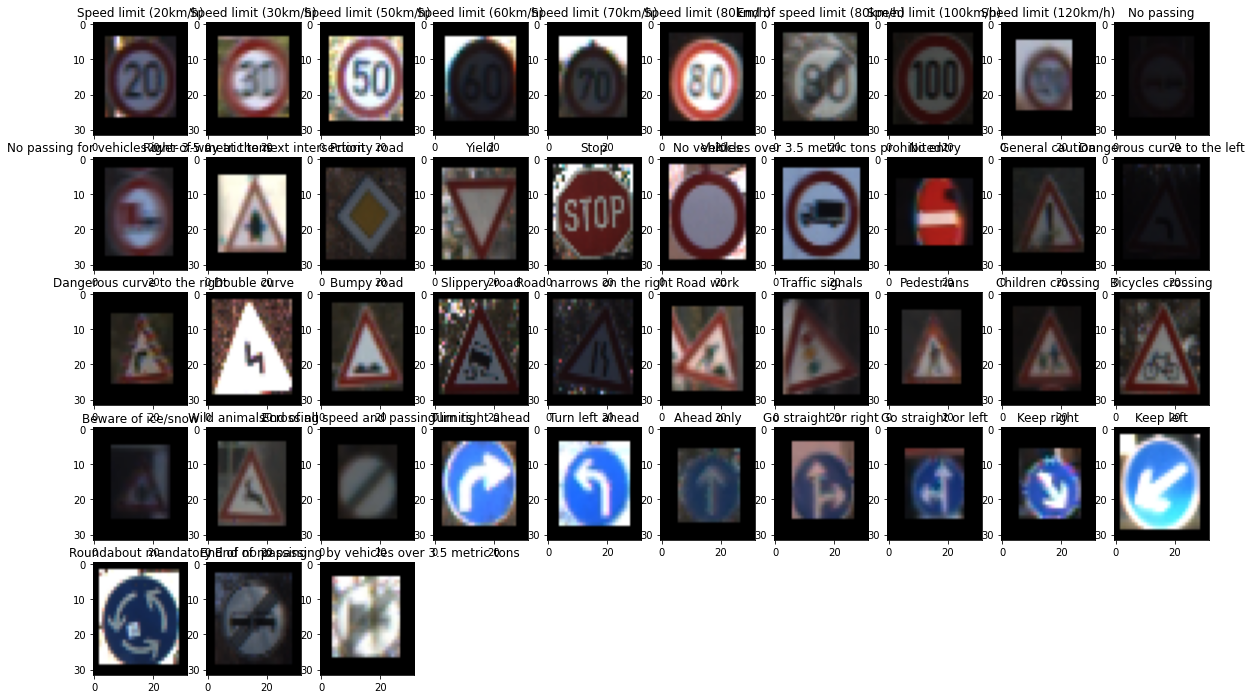

In [16]:
rows = 5
cols = 10
#offset = 300
plt.figure(figsize=(20,12))
for i, img in enumerate(np.array(list(signs_ref.groupby(by='lab').nth(5).Pict))):
    ax = plt.subplot(rows, cols, i+1) #,  title=names.iloc[i].SignName)
    ax.set_title(names.iloc[i].SignName, wrap=True)
    plt.imshow(img, aspect='auto')
#plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Input, \
    GlobalAveragePooling2D, BatchNormalization, Activation
from tensorflow.keras.models import load_model, model_from_json    
from tensorflow.keras.utils import to_categorical    
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
#!pip install tensorflow-addons
import tensorflow_addons as tfa

In [0]:
batch_size = 128
epochs = 75

In [0]:
y_train = to_categorical(y_train, n_classes)
y_valid  = to_categorical(y_valid , n_classes)
y_test  = to_categorical(y_test , n_classes)

In [21]:
print(f"X_train {X_train.shape}, y_train {y_train.shape}")
print(f"X_valid {X_valid.shape}, y_valid {y_valid.shape}")
print(f"X_test {X_test.shape}, y_test {y_test.shape}")

X_train (34799, 32, 32, 3), y_train (34799, 43)
X_valid (4410, 32, 32, 3), y_valid (4410, 43)
X_test (12630, 32, 32, 3), y_test (12630, 43)


### Data generator

In [22]:
data_gen_args = dict(#samplewise_center=True,
                     samplewise_std_normalization=True,
                     rotation_range=50,
                     #zca_whitening=True, 
                     #zca_epsilon=1e-06,
                     zoom_range=0.2,
                     rescale=1./255,
                     width_shift_range=0.2,
                     height_shift_range=0.2)
image_datagen = ImageDataGenerator(**data_gen_args)
valid_datagen = ImageDataGenerator(**data_gen_args)
# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1
# Only required if featurewise_center or featurewise_std_normalization or zca_whitening are set to True.
#image_datagen.fit(X_train, augment=True, seed=seed) 
#valid_datagen.fit(X_valid, augment=True, seed=seed)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [23]:
data_gen_args2 = dict(#samplewise_center=True,
                    samplewise_std_normalization=True,
                    rescale=1./255)
test_datagen = ImageDataGenerator(**data_gen_args2)
# Only required if featurewise_center or featurewise_std_normalization or zca_whitening are set to True.
#test_datagen.fit(X_test, augment=True, seed=seed)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [0]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

### Telegram

In [0]:
import json
import requests

def to_telegram(mess, cmd=None):
    bot_id = "867533512:AAGgw33CTqg4QAXy4XyRbC....."
    chat_id="123456789"
    if cmd is None:
        address="https://api.telegram.org/bot" + bot_id + "/sendMessage"
        data = {'chat_id': chat_id, 'text': mess}
    else:
        address="https://api.telegram.org/bot" + bot_id + cmd
        data = {'chat_id': chat_id}
        print('cmd:{}'.format(cmd))
    try:
        r = requests.post(address, data=data)
        print("telegram API result:", r)
    except (HTTPSConnectionPool, TimeoutError) as err:
        if '200' in err:
            print("telegram API result: {}".format(err))
        else:
            print('to_telegram failed: {}'.format(err))
    else:
        print('to_telegram failed.')

class YourTelegramCallback(tf.keras.callbacks.Callback):

    def on_train_batch_end(self, batch, logs=None):
        pass
        #print('For batch {}, loss is {:7.2f}.'.format(batch, logs['loss']))

    def on_test_batch_end(self, batch, logs=None):
        pass
        #print('For batch {}, loss is {:7.2f}.'.format(batch, logs['loss']))

    def on_epoch_end(self, epoch, logs=None):
        #print('The average loss for epoch {} is {:7.2f} and mean absolute error is {:7.2f}.'.format(epoch, logs['loss'], logs['mae']))
        #to_telegram('Epoch {}, val_loss {:7.3f}, val_dice_coef {:7.3f}.'.format(epoch, logs['val_loss'], logs['val_dice_coef']))
        to_telegram('Epoch {}, val_loss {:7.3f}, val_acc {:7.3f}.'.format(epoch, logs['val_loss'], logs['val_accuracy']))


### Utils

In [0]:
def plot_history(history, title, ix_number=-1, y_true=None, bins=50, accuracy=[]):    
    
  # plot train and validation loss
# history - dictionary
# loss, val_loss - keys for the plot
# accuracy=['accuracy', 'val_accuracy'] - keys for the accuracy plot
# ix_number - list index of the list values in history['pred'][ix_number] or the last one default
# pred - key and values list must match y_true length for the histogram
# bins - bins quantity for the hystogram

  fig = plt.figure(figsize=(14,5))
  ax = fig.add_subplot(1, 2, 1)
  ax.set_title(title)
  ax.plot(history['loss'], label='Model loss')
  ax.plot(history['val_loss'], label='Model val_loss')
  ax.set_ylabel('loss')
  ax.set_xlabel('epoch')
  if len(accuracy)==0:
    ax.legend(loc='upper right') #['train','validation'], loc='upper right')
  elif len(accuracy)==2:
    ax2 = ax.twinx()
    ax2.plot(history[accuracy[0]], label='Train')
    ax2.plot(history[accuracy[1]], label='Validation')
    ax2.set_ylabel('accuracy')
    ax2.legend(loc='right') 

  ax = fig.add_subplot(1, 2, 2)
  ax.set_title(title)
  if 'pred' in history.keys():
    if ix_number==-1:
        ix = len(history['pred'])-1
    else:
        ix = ix_number
    if y_true is None:
        ax.hist(history['pred'][ix], label='prediction', bins=bins)
    else:
        #ax.hist([history['pred'][ix], y_true], label=['prediction', 'y_true'], bins=bins)
        ax.hist(np.concatenate((history['pred'][ix], y_true), axis=1), 
                label=['prediction', 'y_true'], 
                color=['red', 'lime'], 
                bins=bins)
        ax.legend(prop={'size': 10})
        
    ax.set_xlabel('target')
    print('predictions ', len(history['pred']))
  fig.tight_layout()

  plt.show()

In [0]:
# https://www.kaggle.com/artgor/where-do-the-robots-drive

from sklearn.metrics import confusion_matrix #mean_squared_error, accuracy_score
import itertools

def plot_confusion_matrix(truth, pred, classes, normalize=False, title='', to_file=None, figsize=(10, 10)):
    cm = confusion_matrix(truth, pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    fig = plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix', size=15)
    plt.colorbar(fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)
    plt.tight_layout()
    if to_file is None:
        plt.show()
    else:
        plt.savefig(to_file, bbox_inches='tight')
        plt.close(fig)

In [0]:
def save_model_n(data_folder, model, history_dict, mod_number):
      # serialize model to JSON
  model_json = model.to_json()
  file_to_save = data_folder / ("model" + str(mod_number) + ".json")
  with open(file_to_save, "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5

  with open(file_to_save, "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
  file_to_save = str(data_folder / ("model" + str(mod_number) + ".h5"))
  print('file_to_save:', file_to_save)
  model.save_weights(file_to_save)
  print("Saved model to disk")

  file_to_save = data_folder / ("history_" + str(mod_number) + ".pickle")
  with open(file_to_save, 'wb') as f:
      # Pickle the 'data' dictionary using the highest protocol available.
      pickle.dump(history_dict, f, pickle.HIGHEST_PROTOCOL)

In [0]:
def load_model_n(data_folder, mod_number):
  # load json and create model
  file_to_read = data_folder / ("model" + str(mod_number) + ".json")
  json_file = open(file_to_read, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  loaded_model = model_from_json(loaded_model_json)

  # load weights into new model
  file_to_read = data_folder / ("model" + str(mod_number) + ".h5")
  loaded_model.load_weights(str(file_to_read))
  print("Loaded model from disk")

  # evaluate loaded model on test data
  loaded_model.compile(loss='mse', optimizer='adam') #, metrics=['accuracy'])

  file_to_read = data_folder / ("history_" + str(mod_number) + ".pickle")
  with open(file_to_read, 'rb') as f:
      # The protocol version used is detected automatically, so we do not
      # have to specify it.
      history_ = pickle.load(f)
      
  return loaded_model, history_      

### Model Architecture

In [0]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

In [0]:
#ResNet50(include_top=True, weights='imagenet', input_tensor=None, input_shape=None,
#    pooling=None, classes=1000, **kwargs)
def create_resnet_model(drop_rate=0.1, rnet_out_name="conv3_block3_out",
                        optimizer = tf.keras.optimizers.Adam(), loss_object = tf.keras.losses.CategoricalCrossentropy(from_logits=True)):
    base_model = tf.keras.applications.ResNet50(weights= 'imagenet', include_top=False, input_shape= (IMG_HEIGHT, IMG_WIDTH,3))
    #x = base_model.output
    #x = base_model.get_layer("conv4_block6_out").output
    x = base_model.get_layer(rnet_out_name).output
    #x = GlobalAveragePooling2D()(x)
    x = Flatten()(x)
    x = Dense(2048, activation='relu', name='dense_1')(x)
    x = Dropout(drop_rate, name='drop_1')(x)
    x = Dense(512, activation='relu', name='dense_2')(x)
    x = Dropout(drop_rate, name='drop_2')(x)
    #outputs = Dense(n_classes, name='predictions', activation= 'softmax')(x)
    outputs = Dense(n_classes, name='predictions')(x)
    model_r = tf.keras.Model(inputs=base_model.input, outputs=outputs)
    #loss_object = tf.keras.losses.CategoricalCrossentropy(from_logits=True) # used with one hot labels
    #loss_object = tf.keras.losses.SparseCategoricalCrossentropy( ) # used with integer labels
    
    #test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')
    model_r.compile(optimizer=optimizer,
                loss=loss_object,
                metrics=['accuracy'])
    return model_r

In [0]:
radam = tfa.optimizers.RectifiedAdam()
ranger = tfa.optimizers.Lookahead(radam, sync_period=10, slow_step_size=0.5)

model_r = create_resnet_model(drop_rate=0.2, rnet_out_name="conv2_block3_out", optimizer = ranger)
model_r.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
_____________________________

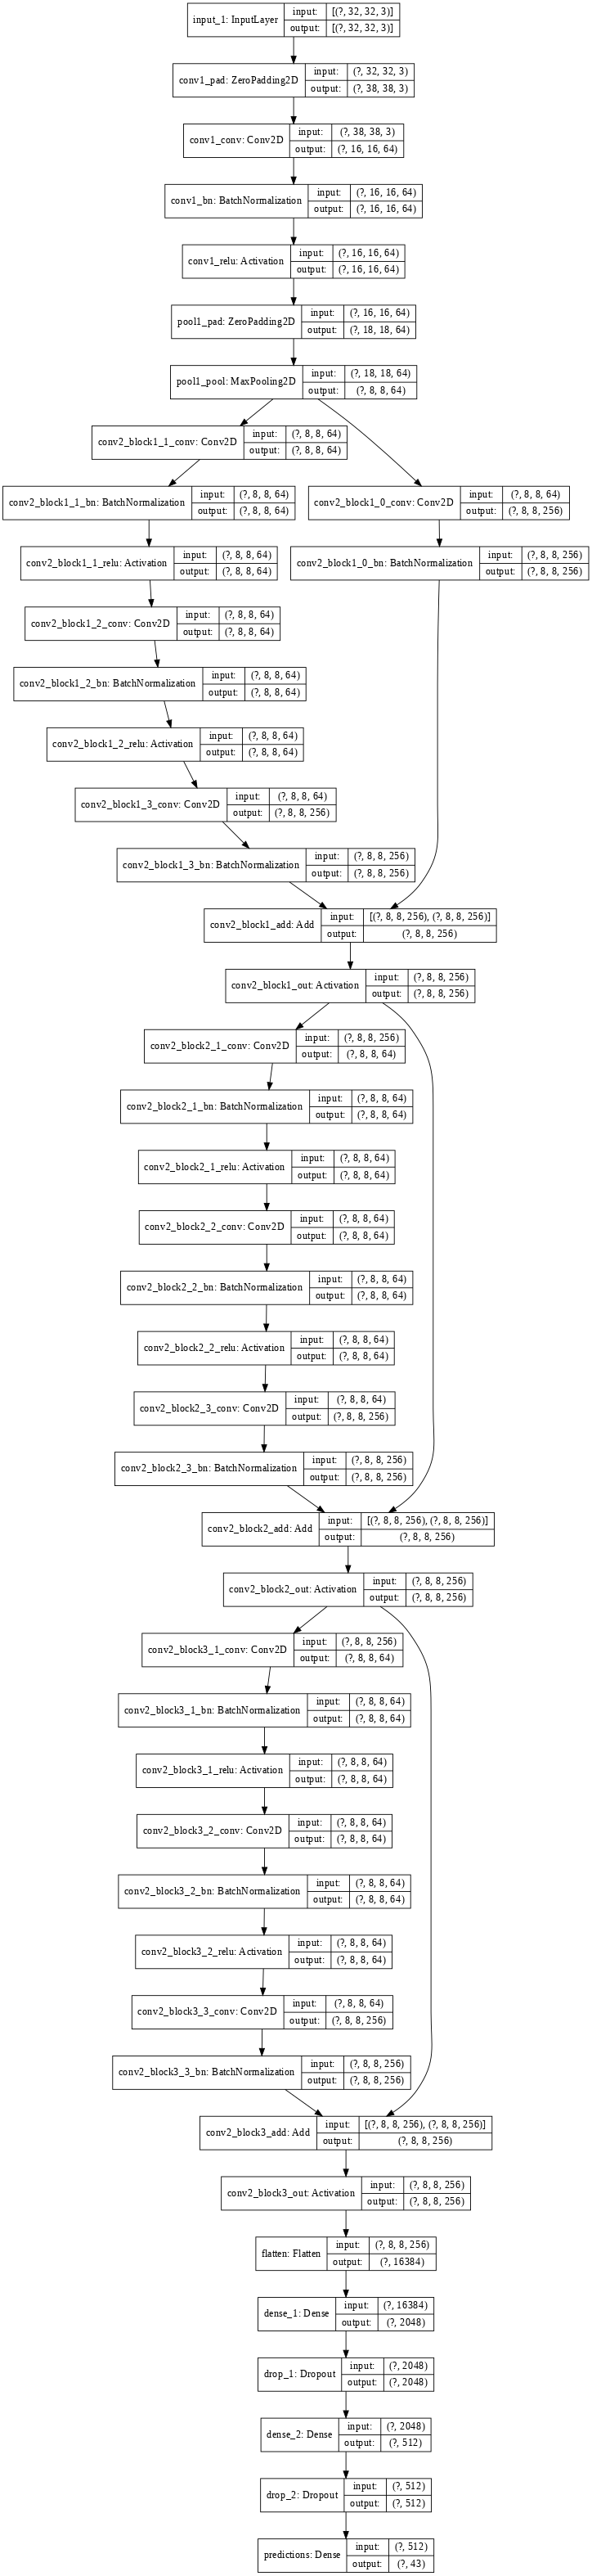

In [0]:
#tf.keras.utils.plot_model(model_r, show_shapes=True, dpi=64) #dilation_rate

In [0]:
def create_2kernel_cnn(drop_rate=0.2):
    padding='same'
    inputs = Input(shape=(IMG_HEIGHT, IMG_WIDTH ,3), name='input')
    x = Conv2D(16, 5, padding=padding, activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3))(inputs)
    y = Conv2D(16, 3, padding=padding, activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3))(inputs)
    x = MaxPooling2D()(x)
    y = MaxPooling2D()(y)
    x = Conv2D(32, 5, padding=padding, activation='relu')(x)
    y = Conv2D(32, 3, padding=padding, activation='relu')(y)
    x = MaxPooling2D()(x)
    y = MaxPooling2D()(y)
    x = Conv2D(64, 5, padding=padding, activation='relu')(x)
    y = Conv2D(64, 3, padding=padding, activation='relu')(y)
    x = MaxPooling2D()(x)
    y = MaxPooling2D()(y)
    x = Conv2D(128, 5, padding=padding, activation='relu')(x)
    y = Conv2D(128, 3, padding=padding, activation='relu')(y)
    x = tf.keras.layers.concatenate([x, y])
    x = Flatten()(x)
    x = Dense(2048, activation='relu', name='dense_1')(x)
    x = Dropout(drop_rate, name='drop_1')(x)
    x = Dense(512, activation='relu', name='dense_2')(x)
    x = Dropout(drop_rate, name='drop_2')(x)
    outputs = Dense(n_classes, name='predictions')(x)

    model_f = tf.keras.Model(inputs=inputs, outputs=outputs)
    loss_object = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    optimizer = tf.keras.optimizers.Adam()
    #test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')
    model_f.compile(optimizer=optimizer,
                loss=loss_object,
                metrics=['accuracy'])
    return model_f

In [0]:
#model_r = create_2kernel_cnn()
#model_r.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 16)   1216        input[0][0]                      
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 16)   448         input[0][0]                      
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 16, 16, 16)   0           conv2d[0][0]                     
____________________________________________________________________________________________

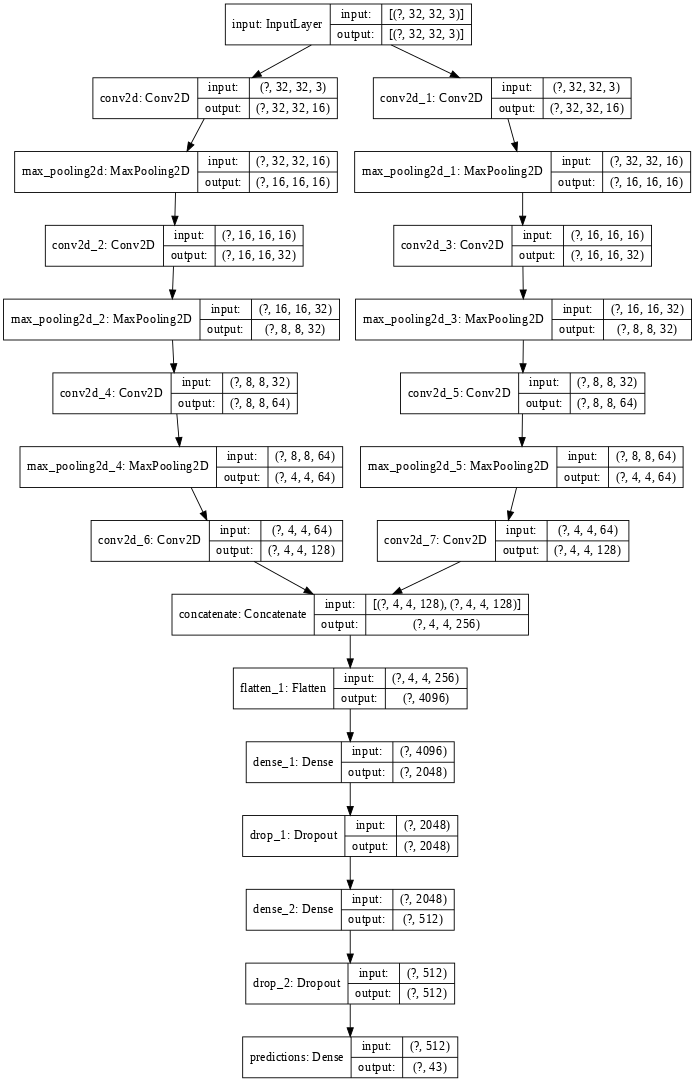

In [0]:
#tf.keras.utils.plot_model(model_r, show_shapes=True, dpi=64)

In [0]:
def create_conv_net(net_type='lenet5', padding='valid', drop_rate=0.2, activation='relu', dense_layers=[4096,512], batch_norm=False,
                  optimizer = 'adam', 
                  loss_object = tf.keras.losses.CategoricalCrossentropy(from_logits=True)):
    inputs = Input(shape=(IMG_HEIGHT, IMG_WIDTH ,3), name='input')
    x = Conv2D(32, 5, padding=padding, input_shape=(IMG_HEIGHT, IMG_WIDTH ,3), name='conv_1')(inputs)
    if net_type=='lenet5':
        x = Activation(activation)(x)
        x = MaxPooling2D()(x)
    else:
        if batch_norm:
            x = BatchNormalization()(x)
        x = Activation(activation)(x)
    x = Conv2D(64, 5, padding=padding, name='conv_2')(x)
    x = Activation(activation)(x)
    if net_type=='lenet5':
        x = MaxPooling2D()(x)
    x = Conv2D(128, 5, padding=padding, name='conv_3')(x)
    x = Activation(activation)(x)
    if net_type=='lenet5':
        x = MaxPooling2D()(x)
    x = Conv2D(128, 5, padding=padding, name='conv_4')(x)
    x = Activation(activation)(x)
    if net_type=='lenet5':
        x = MaxPooling2D()(x)
    x = Flatten()(x)
    x = Dense(dense_layers[0], activation='relu', name='dense_1')(x)
    x = Dropout(drop_rate, name='drop_1')(x)
    x = Dense(dense_layers[1], activation='relu', name='dense_2')(x)
    x = Dropout(drop_rate, name='drop_2')(x)
    outputs = Dense(n_classes, name='predictions')(x)

    model_f = tf.keras.Model(inputs=inputs, outputs=outputs)
    #loss_object = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    #optimizer = tf.keras.optimizers.Adam()
    #test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')
    model_f.compile(optimizer=optimizer,
                loss=loss_object,
                metrics=['accuracy'])
    return model_f

In [33]:
radam = tfa.optimizers.RectifiedAdam()
ranger = tfa.optimizers.Lookahead(radam, sync_period=6, slow_step_size=0.5)

model_r = create_conv_net(net_type='convnet', drop_rate=0.25, padding='valid', batch_norm=True, dense_layers=[4096,512], optimizer = ranger)
model_r.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 64)        51264     
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 20, 20, 128)       204928

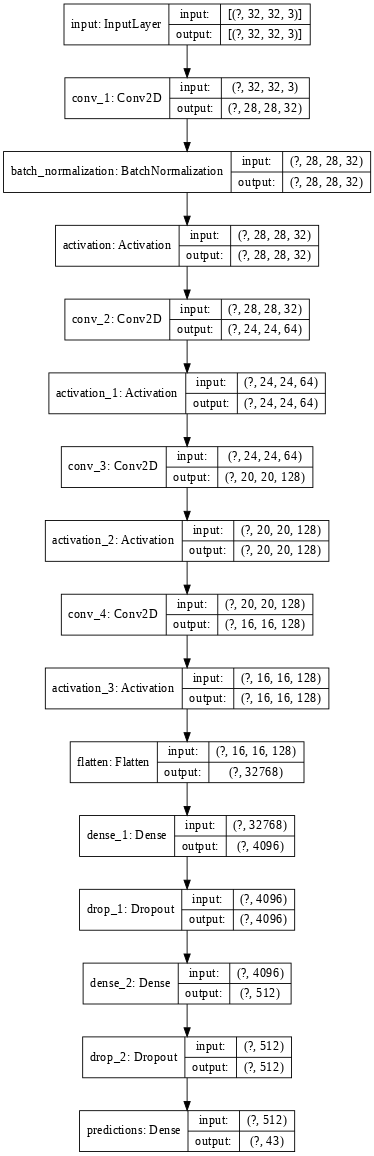

In [34]:
tf.keras.utils.plot_model(model_r, show_shapes=True, dpi=64)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [35]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
history_dict = {}
history = model_r.fit(
        image_datagen.flow(X_train, y=y_train, batch_size=batch_size),
        steps_per_epoch=len(X_train) // batch_size,
        epochs=epochs, 
        validation_data=valid_datagen.flow(X_valid, y_valid, batch_size=batch_size),
        callbacks=[callback, YourTelegramCallback()])

history_dict = history.history.copy()
save_model_n(proj_folder, model_r, history_dict, 1)

Epoch 1/75
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
271/271 [==============================] - ETA: 0s - loss: 2.4126 - accuracy: 0.3080telegram API result: <Response [401]>
to_telegram failed.
271/271 [==============================] - 33s 120ms/step - loss: 2.4126 - accuracy: 0.3080 - val_loss: 1.7399 - val_accuracy: 0.4735
Epoch 2/75
271/271 [==============================] - ETA: 0s - loss: 1.1284 - accuracy: 0.6355telegram API result: <Response [401]>
to_telegram failed.
271/271 [==============================] - 33s 123ms/step - loss: 1.1284 - accuracy: 0.6355 - val_loss: 0.8752 - val_accuracy: 0.7188
Epoch 3/75
271/271 [==============================] - ETA: 0s - loss: 0.5279 - accuracy: 0.8317telegram API result: <Response [401]>
to_telegram failed.
271/271 [==============================] - 32s 119ms/step - loss: 0.5279 - accuracy: 0.8317 - val_loss: 0.4921 - val_accuracy: 0.8503
Epoch 4/75
271/271 [==============================] - ETA:

In [36]:
test_loss, test_acc = model_r.evaluate(test_datagen.flow(X_test, y_test), verbose=2) 
print('\nTest accuracy:', test_acc)
to_telegram(f'test_datagen loss:{test_loss:<8.3f}, acc:{test_acc:<8.3f}')

395/395 - 2s - loss: 0.1997 - accuracy: 0.9552

Test accuracy: 0.9551860690116882
telegram API result: <Response [401]>
to_telegram failed.


395/395 - 2s
predictions  1


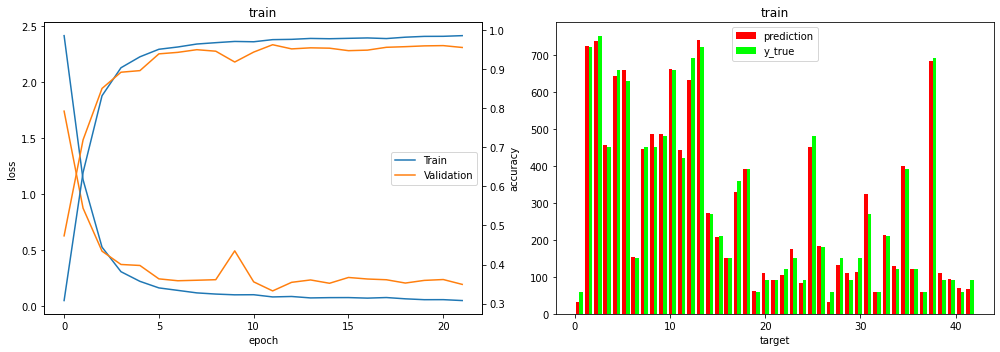

In [37]:
y_hat = model_r.predict(test_datagen.flow(X_test, shuffle=False), verbose=2) 
y_hat = np.argmax(y_hat, axis=1)
history_dict['pred'] = []
history_dict['pred'].append(y_hat[...,np.newaxis])
plot_history(history_dict,'train', y_true=np.argmax(y_test, axis=1)[...,np.newaxis],accuracy=['accuracy', 'val_accuracy'], bins=43)

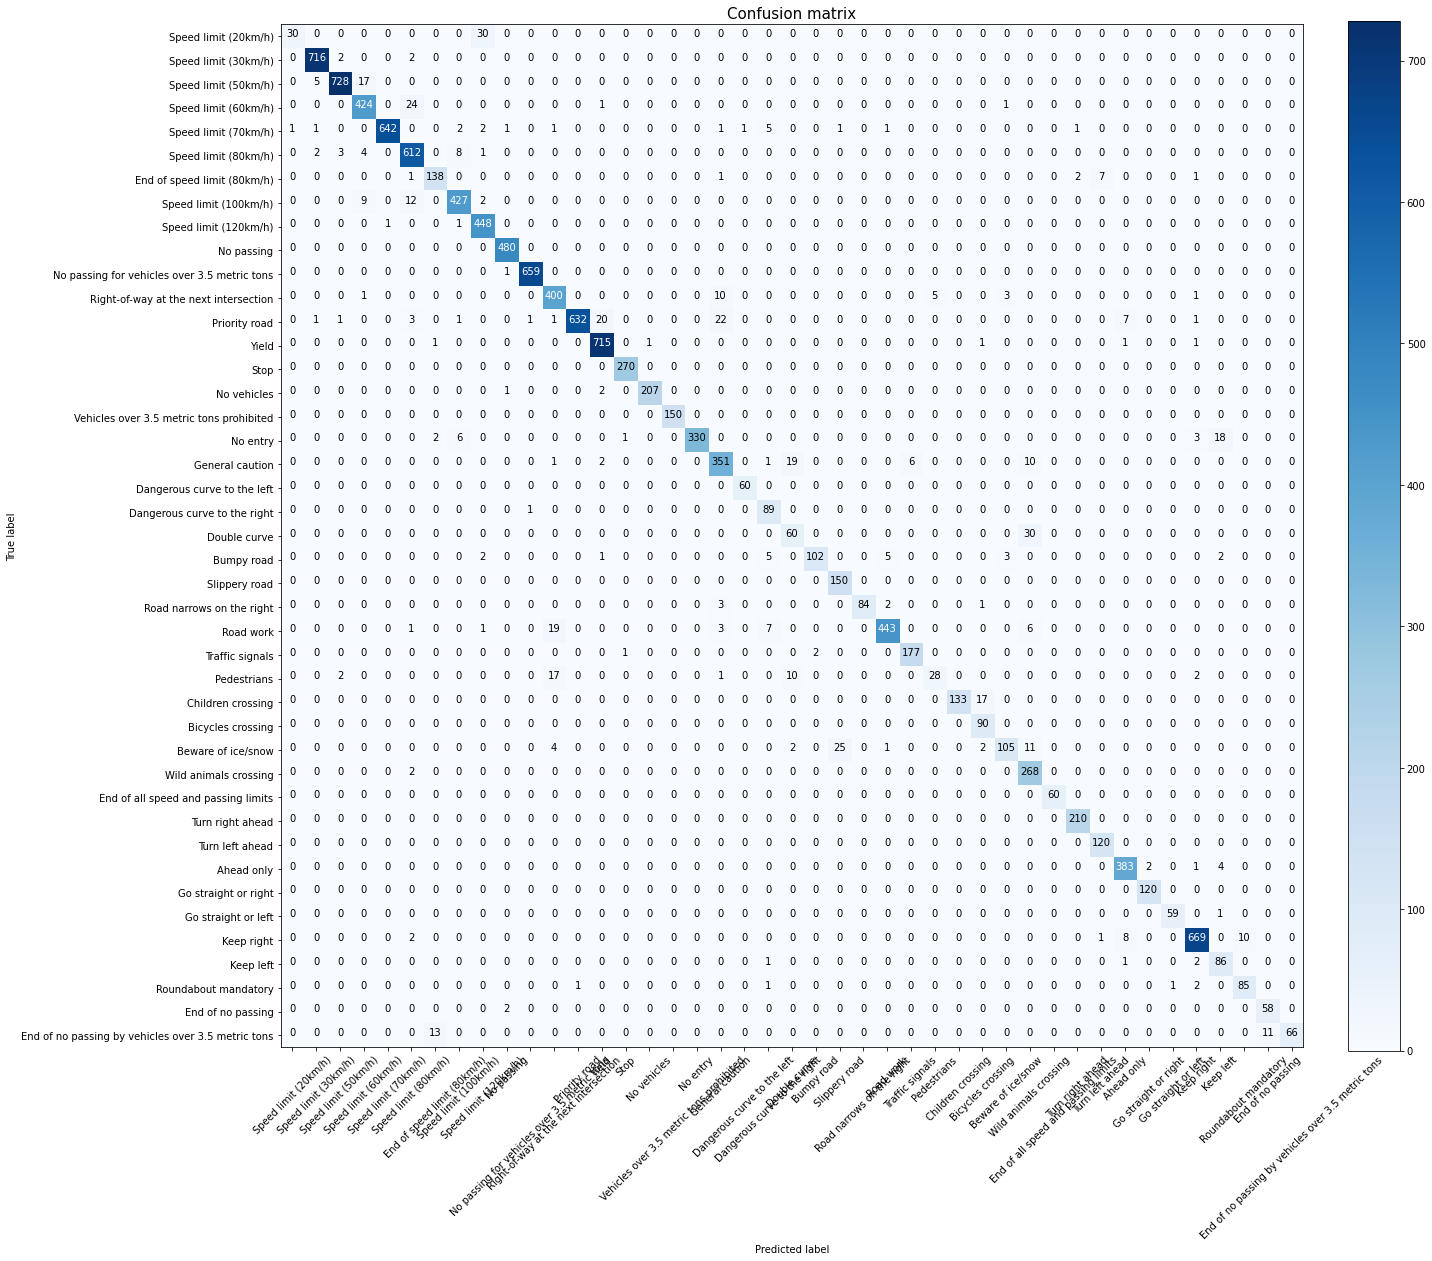

In [38]:
plot_confusion_matrix(np.argmax(y_test, axis=1), y_hat, names.SignName, normalize=False, title='', to_file=None, figsize=(20,20))

In [0]:
#395/395 - 11s - loss: 0.3276 - accuracy: 0.9325 resnet drop_rate=0.2, rnet_out_name="conv3_block4_out"
#395/395 - 11s - loss: 0.3835 - accuracy: 0.9162 resnet drop_rate=0.2, rnet_out_name="conv3_block3_out"
#395/395 - 11s - loss: 0.3994 - accuracy: 0.9241 resnet drop_rate=0.5, rnet_out_name="conv3_block3_out"
#395/395 - 11s - loss: 0.4806 - accuracy: 0.9030 resnet drop_rate=0.5, rnet_out_name="conv2_block3_out"
#395/395 - 10s - loss: 0.3058 - accuracy: 0.9285 lenet-5 masked input
#395/395 - 10s - loss: 0.3954 - accuracy: 0.9013 lenet-5 not masked input
#395/395 - 7s - loss: 0.3612 - accuracy: 0.9113 lenet-5 masked input augment 0.3
#395/395 - 7s - loss: 0.4979 - accuracy: 0.8884 lenet-5 masked input augment 0.3 early acc
#395/395 - 2s - loss: 0.5252 - accuracy: 0.8732 lenet-5 masked input, augment 0.3, early loss, padding valid
#395/395 - 2s - loss: 0.5594 - accuracy: 0.8599 lenet-5 masked input, augment 0.3, early loss, padding same
#395/395 - 2s - loss: 0.5413 - accuracy: 0.8790 lenet-5 masked input augment 0.3 early acc, padding valid, scale 1/128
#395/395 - 24s - loss: 5.1071 - accuracy: 0.2344 lenet-5 masked input augment 0.3 early acc, padding valid, scale 1/128, ZCA-withening
#395/395 - 2s - loss: 0.5465 - accuracy: 0.8960 lenet-5 masked input, shift 0.2, Std, No Mean, early acc, padding valid, scale 1/255
#395/395 - 2s - loss: 0.5514 - accuracy: 0.8961 lenet-5 masked input, shift 0.2, Std, No Mean, early acc, padding valid, scale 1/255, batch 128
#395/395 - 2s - loss: 0.4610 - accuracy: 0.9088 lenet-5 - no maxpool, masked input, shift 0.2, Std, No Mean, early acc, padding valid, scale 1/255, batch 128
#395/395 - 2s - loss: 0.2701 - accuracy: 0.9372 lenet-5 - no maxpool, 16x32
#395/395 - 2s - loss: 0.2052 - accuracy: 0.9565 lenet-5 - no maxpool, 16x32x64
#395/395 - 3s - loss: 0.2410 - accuracy: 0.9602 lenet-5 - no maxpool, 16x32x64x128
#395/395 - 2s - loss: 0.1581 - accuracy: 0.9687 32x64x128x4048x512 lookahead(10)
#395/395 - 3s - loss: 0.1927 - accuracy: 0.9562 32x64x128x128x4048x512 lookahead(10)
#395/395 - 3s - loss: 0.1924 - accuracy: 0.9543 32x64x128x128x2048x512 lookahead(10) BatchNorm, no maxpool
#395/395 - 2s - loss: 0.3316 - accuracy: 0.9269  drop_rate=0.2, rnet_out_name="conv2_block3_out" lookahead(10)

#395/395 - 3s - loss: 0.1885 - accuracy: 0.9661 16x32x64x128x2048x512 Adam BatchNorm, no maxpool, drop_rate=0.2
#395/395 - 4s - loss: 0.2483 - accuracy: 0.9576 16x32x64x128x4096x512 Adam BatchNorm, no maxpool, drop_rate=0.2
#395/395 - 2s - loss: 0.1951 - accuracy: 0.9536 16x32x64x128x1500x512 Adam BatchNorm, no maxpool, drop_rate=0.2
#395/395 - 2s - loss: 0.2471 - accuracy: 0.9491 16x32x64x128x1024x512 Adam BatchNorm, no maxpool, drop_rate=0.2
#395/395 - 3s - loss: 0.3386 - accuracy: 0.9468 16x32x64x128x2048x512 Adam BatchNorm, no maxpool, drop_rate=0.2
#395/395 - 3s - loss: 0.2952 - accuracy: 0.9430 16x32x64x128x2048x512 Adam no BatchNorm, no maxpool, drop_rate=0.2
#395/395 - 2s - loss: 0.2875 - accuracy: 0.9553 32x64x128x128x4096x512 Adam BatchNorm, no maxpool, drop_rate=0.25
#395/395 - 2s - loss: 0.2502 - accuracy: 0.9475 128x64x32x32x4096x512 Adam BatchNorm, no maxpool, drop_rate=0.25

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [39]:
os.path.join(proj_folder, data_dir, 'schield*.jpg')

'/content/car/CarND-Traffic-Sign-Classifier-Project/data/schield*.jpg'

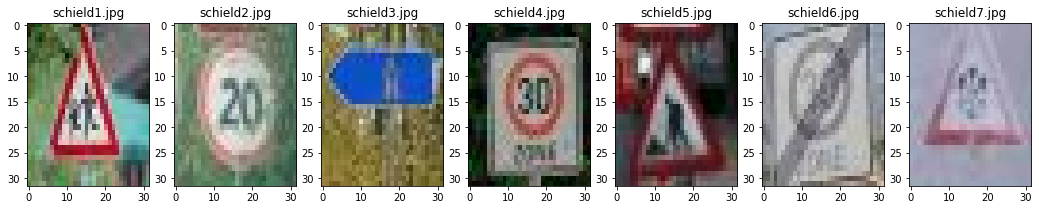

In [40]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
#import matplotlib.image as mpimg
import cv2
import glob
from math import ceil

#pict1 = 'schield1.jpg'
images = glob.glob(os.path.join(proj_folder, data_dir, 'schield*.jpg'))
#rows = ceil(len(images)/2.0)
cols = len(images)
plt.figure(figsize=(18,3))
for i, fname in enumerate(sorted(images)):
    img = cv2.cvtColor(cv2.imread(fname), cv2.COLOR_BGR2RGB)
    plt.subplot(1, cols, i+1,  title=os.path.basename(fname)), plt.imshow(img, aspect='auto')

plt.show()

### Predict the Sign Type for Each Image

In [41]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
X_new = []
for i, fname in enumerate(sorted(images)):
    img = cv2.cvtColor(cv2.imread(fname), cv2.COLOR_BGR2RGB)
    X_new.append(img)
X_new = np.array(X_new)
X_new.shape

(7, 32, 32, 3)

In [42]:
#model_r = load_model(os.path.join(proj_folder, model_file))
model, hist = load_model_n(proj_folder, 1)
model.summary()

Loaded model from disk
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 64)        51264     
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 20

In [43]:
y_hat = model.predict(test_datagen.flow(X_new, shuffle=False), verbose=2) 
y_cat = np.argmax(y_hat, axis=1)
y_cat

1/1 - 0s


array([28,  0, 38,  1, 11, 18, 23])

In [44]:
names.iloc[y_cat].SignName.tolist()

['Children crossing',
 'Speed limit (20km/h)',
 'Keep right',
 'Speed limit (30km/h)',
 'Right-of-way at the next intersection',
 'General caution',
 'Slippery road']

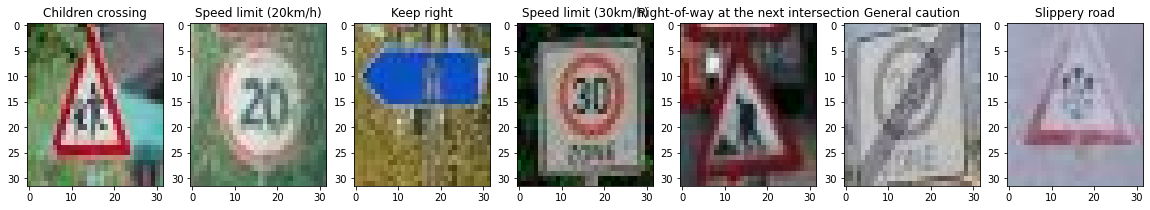

In [45]:
plt.figure(figsize=(20,3))
for i, fname in enumerate(sorted(images)):
    img = cv2.cvtColor(cv2.imread(fname), cv2.COLOR_BGR2RGB)
    plt.subplot(1, cols, i+1,  title=names.iloc[y_cat].SignName.tolist()[i]), plt.imshow(img, aspect='auto')

plt.show()

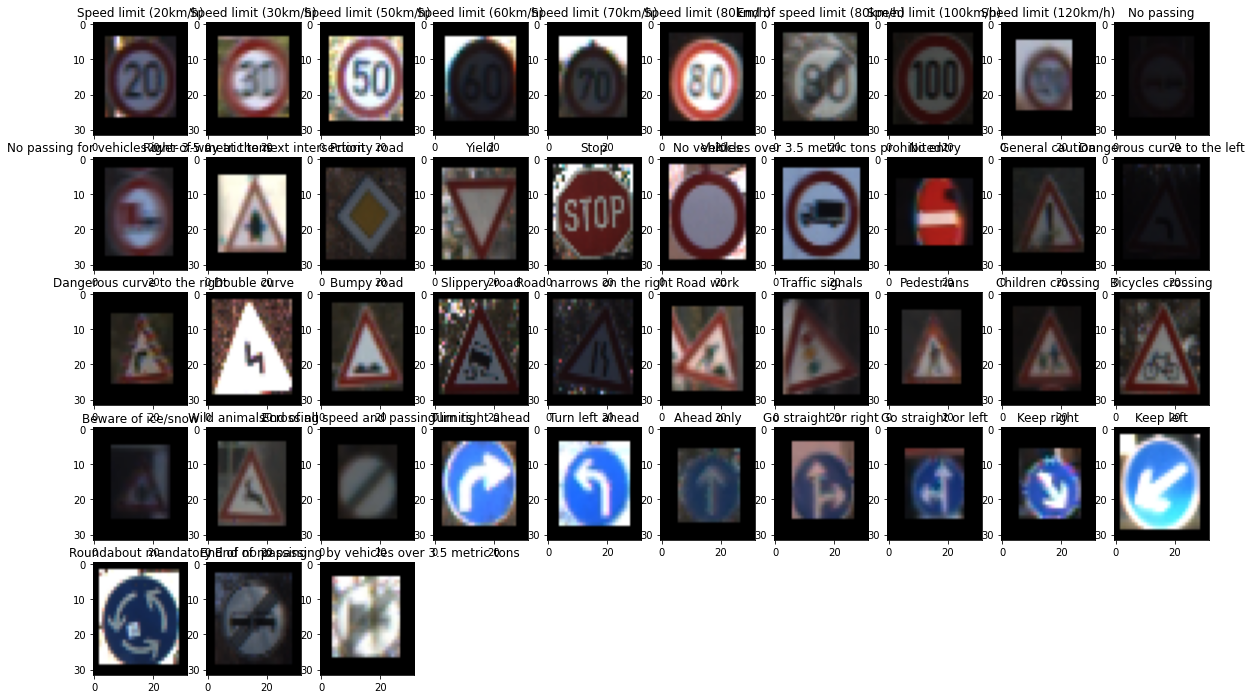

In [46]:
rows = 5
cols = 10
#offset = 300
plt.figure(figsize=(20,12))
for i, img in enumerate(np.array(list(signs_ref.groupby(by='lab').nth(5).Pict))):
    ax = plt.subplot(rows, cols, i+1) #,  title=names.iloc[i].SignName)
    ax.set_title(names.iloc[i].SignName, wrap=True)
    plt.imshow(img, aspect='auto')
#plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

### Analyze Performance

In [47]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
print(f'Two signs are not in dataset\nThe accuracy for the 5 images in dataset is {4/5*100}%')

Two signs are not in dataset
The accuracy for the 5 images in dataset is 80.0%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

In [48]:
logits, idxs = tf.math.top_k(tf.constant(y_hat), k=5)
#[ 0, 11, 28,  5,  1]
for i, indices in enumerate(idxs):
    print(np.array(logits[i]))
    print(names.iloc[indices].SignName.tolist(), '\n')

[14.831979  11.091214   9.963584   6.087606   4.6182885]
['Children crossing', 'Speed limit (20km/h)', 'Speed limit (80km/h)', 'Bicycles crossing', 'Speed limit (50km/h)'] 

[21.11521   15.453763  12.776239   3.3088167  2.6887798]
['Speed limit (20km/h)', 'Roundabout mandatory', 'Speed limit (30km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)'] 

[9.363825  8.2526045 5.017267  4.8989825 3.807929 ]
['Keep right', 'Keep left', 'Priority road', 'Ahead only', 'General caution'] 

[6.4815764 4.406181  4.187944  3.0790462 1.9892436]
['Speed limit (30km/h)', 'Speed limit (80km/h)', 'Speed limit (20km/h)', 'Speed limit (50km/h)', 'Speed limit (100km/h)'] 

[14.2023735 14.080748   8.72368    1.6813532  1.40354  ]
['Right-of-way at the next intersection', 'Beware of ice/snow', 'Road work', 'Pedestrians', 'Ahead only'] 

[5.4157357 2.1287324 1.6717192 1.5580239 1.4922041]
['General caution', 'Right-of-way at the next intersection', 'Dangerous curve to the right', 'Pedestrians', 'Traffic sign

### Project Writeup

see project3.md on github